In [1]:
import pandas as pd

train_data_with_cone = pd.read_parquet('../ml/processed_events_50k/raw_cone_data.parquet')

In [2]:
import sys
sys.path.insert(0, "../")
from ml.generate_cone_data import normalize_cone_features

In [ ]:
train_data_with_cone

,primary_kinetic_energy,X_mean_min,Y_mean_min,Z_mean_min,X_mean_max,Y_mean_max,Z_mean_max,radius,event_id,min_plane,max_plane,sin_azimuth,cos_azimuth,sin_zenith,cos_zenith
0,0.515402,0.000096,-0.02273,0.022159,-0.600783,-0.917898,0.013106,-0.102039,44893127_41,4.0,0.0,0.000949,1.0,0.018375,0.999831
1,0.420981,-0.094458,-0.024152,0.004143,-0.320098,-0.628396,0.013094,-0.668921,44893197_207,1.0,0.0,0.004434,0.99999,0.022497,0.999747
2,0.980315,-0.015009,-0.01261,0.010144,0.397848,0.597439,0.013048,-1.343763,44893281_184,2.0,0.0,0.065306,0.997865,0.033058,0.999453
3,0.314315,-0.088135,-0.016185,0.016156,-1.197383,-0.342603,0.013124,-0.509702,44893237_87,3.0,0.0,0.109408,0.993997,0.009567,0.999954
4,-0.525294,-0.086523,-0.023079,0.010149,-0.88458,-0.468934,0.013116,1.033924,44893263_85,2.0,0.0,0.099865,0.995001,0.013858,0.999904


In [4]:
train_data_with_cone = normalize_cone_features(train_data_with_cone)

In [6]:
# enable autoreloading of modules
%load_ext autoreload
%autoreload 2

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from src.plotting import plot_2d_scatter, plot_histogram, plot_records_per_plane, plot_cone_with_scatter, plot_y_values_per_plane, generate_3d_cone_animation
from src.data_exploration import calculate_max_records_events, select_event_data, print_y_values_per_plane
from src.featurization import calcualte_cone_parameters


# Prepare training data

Select input and output columns

In [8]:
import sklearn as sk
from sklearn.model_selection import train_test_split

input_columns = [
            "primary_kinetic_energy",
            "sin_azimuth", "cos_azimuth", "sin_zenith", "cos_zenith"
        ]
output_columns = [
    'X_mean_min', 'Y_mean_min', 'Z_mean_min',
    'X_mean_max', 'Y_mean_max', 'Z_mean_max',
    'radius'
]
batch_identifier = "event_id"

Calculate meand and std of secondary features

In [9]:
train_data_with_cone

,primary_kinetic_energy,X_mean_min,Y_mean_min,Z_mean_min,X_mean_max,Y_mean_max,Z_mean_max,radius,event_id,min_plane,max_plane,sin_azimuth,cos_azimuth,sin_zenith,cos_zenith
0,0.515402,0.000096,-0.02273,0.022159,-0.600783,-0.917898,0.013106,-0.102039,44893127_41,4.0,0.0,0.000949,1.0,0.018375,0.999831
1,0.420981,-0.094458,-0.024152,0.004143,-0.320098,-0.628396,0.013094,-0.668921,44893197_207,1.0,0.0,0.004434,0.99999,0.022497,0.999747
2,0.980315,-0.015009,-0.01261,0.010144,0.397848,0.597439,0.013048,-1.343763,44893281_184,2.0,0.0,0.065306,0.997865,0.033058,0.999453
3,0.314315,-0.088135,-0.016185,0.016156,-1.197383,-0.342603,0.013124,-0.509702,44893237_87,3.0,0.0,0.109408,0.993997,0.009567,0.999954
4,-0.525294,-0.086523,-0.023079,0.010149,-0.88458,-0.468934,0.013116,1.033924,44893263_85,2.0,0.0,0.099865,0.995001,0.013858,0.999904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46927,1.068902,-0.018738,-0.012996,0.010145,0.35457,1.42201,0.01305,0.595532,44893271_123,2.0,0.0,0.105722,0.994396,0.033599,0.999435
46928,0.898455,-0.088949,-0.020328,0.004142,-0.007171,-0.490095,0.013076,-1.441307,44893113_235,1.0,0.0,0.036242,0.999343,0.027215,0.99963
46929,0.734155,0.027822,-0.017664,0.046185,-1.069458,-0.468707,0.013121,-1.219075,44893226_153,8.0,0.0,0.033368,0.999443,0.010863,0.999941
46930,0.034895,-0.119868,-0.023481,0.004144,-1.213713,-0.845885,0.013124,-1.286891,44893253_210,1.0,0.0,0.028359,0.999598,0.008054,0.999968


In [10]:
train_data_with_cone

,primary_kinetic_energy,X_mean_min,Y_mean_min,Z_mean_min,X_mean_max,Y_mean_max,Z_mean_max,radius,event_id,min_plane,max_plane,sin_azimuth,cos_azimuth,sin_zenith,cos_zenith
0,0.515402,0.000096,-0.02273,0.022159,-0.600783,-0.917898,0.013106,-0.102039,44893127_41,4.0,0.0,0.000949,1.0,0.018375,0.999831
1,0.420981,-0.094458,-0.024152,0.004143,-0.320098,-0.628396,0.013094,-0.668921,44893197_207,1.0,0.0,0.004434,0.99999,0.022497,0.999747
2,0.980315,-0.015009,-0.01261,0.010144,0.397848,0.597439,0.013048,-1.343763,44893281_184,2.0,0.0,0.065306,0.997865,0.033058,0.999453
3,0.314315,-0.088135,-0.016185,0.016156,-1.197383,-0.342603,0.013124,-0.509702,44893237_87,3.0,0.0,0.109408,0.993997,0.009567,0.999954
4,-0.525294,-0.086523,-0.023079,0.010149,-0.88458,-0.468934,0.013116,1.033924,44893263_85,2.0,0.0,0.099865,0.995001,0.013858,0.999904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46927,1.068902,-0.018738,-0.012996,0.010145,0.35457,1.42201,0.01305,0.595532,44893271_123,2.0,0.0,0.105722,0.994396,0.033599,0.999435
46928,0.898455,-0.088949,-0.020328,0.004142,-0.007171,-0.490095,0.013076,-1.441307,44893113_235,1.0,0.0,0.036242,0.999343,0.027215,0.99963
46929,0.734155,0.027822,-0.017664,0.046185,-1.069458,-0.468707,0.013121,-1.219075,44893226_153,8.0,0.0,0.033368,0.999443,0.010863,0.999941
46930,0.034895,-0.119868,-0.023481,0.004144,-1.213713,-0.845885,0.013124,-1.286891,44893253_210,1.0,0.0,0.028359,0.999598,0.008054,0.999968


In [11]:
train_data_with_cone.shape

(46932, 15)

Impute nan values

In [12]:
# validate na values before imputation
print(f"NA values before imputation:\n{train_data_with_cone.isnull().sum()}")

# impute na with 0
train_data_with_cone = train_data_with_cone.dropna()

# validate na values after imputation
print(f"NA values after imputation:\n{train_data_with_cone.isnull().sum()}")

NA values before imputation:
primary_kinetic_energy    0
X_mean_min                0
Y_mean_min                0
Z_mean_min                0
X_mean_max                1
Y_mean_max                1
Z_mean_max                1
radius                    0
event_id                  0
min_plane                 0
max_plane                 0
sin_azimuth               0
cos_azimuth               0
sin_zenith                0
cos_zenith                0
dtype: int64
NA values after imputation:
primary_kinetic_energy    0
X_mean_min                0
Y_mean_min                0
Z_mean_min                0
X_mean_max                0
Y_mean_max                0
Z_mean_max                0
radius                    0
event_id                  0
min_plane                 0
max_plane                 0
sin_azimuth               0
cos_azimuth               0
sin_zenith                0
cos_zenith                0
dtype: int64


In [13]:
print(f"Event stats columns: {train_data_with_cone.columns}")
print(f"Input columns: {input_columns}")
print(f"Output columns: {output_columns}")

Event stats columns: Index(['primary_kinetic_energy', 'X_mean_min', 'Y_mean_min', 'Z_mean_min',
       'X_mean_max', 'Y_mean_max', 'Z_mean_max', 'radius', 'event_id',
       'min_plane', 'max_plane', 'sin_azimuth', 'cos_azimuth', 'sin_zenith',
       'cos_zenith'],
      dtype='object')
Input columns: ['primary_kinetic_energy', 'sin_azimuth', 'cos_azimuth', 'sin_zenith', 'cos_zenith']
Output columns: ['X_mean_min', 'Y_mean_min', 'Z_mean_min', 'X_mean_max', 'Y_mean_max', 'Z_mean_max', 'radius']


# Define NN using PINA

Test train split

In [14]:
from sklearn.preprocessing import StandardScaler

# split inputs and outputs 
X = train_data_with_cone[input_columns]
y = train_data_with_cone[output_columns]


# y_normalized = y - y.mean()
# y_max = y_normalized.max().max()
# y_normalized = y_normalized / y_max

# create scaler for each output column
y_scaler = StandardScaler()

# fit and transform each column separately
y_normalized = y_scaler.fit_transform(y)

PINA

In [15]:
# import seaborn as sns

# temp_input = pd.concat([y_normalized, X])
# # columns to exclude from the pairplot
# exclude_cols = ['event_id', 'primary_kinetic_energy', 'min_plane', 'max_plane']

# # build dataframe for plotting (only numeric columns)
# plot_df = temp_input.drop(columns=[c for c in exclude_cols if c in temp_input.columns])
# plot_df = plot_df.select_dtypes(include='number')

# sns.pairplot(plot_df)

In [16]:
from pina import Trainer, Condition, LabelTensor
from pina.problem import AbstractProblem
from src.nn import Model
from pina.optim import TorchOptimizer, TorchScheduler
from pina.solver import DeepEnsembleSupervisedSolver
from pina.callback import MetricTracker
import torch



/n/home05/zdimitrov/.conda/envs/multiproc_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
x_pina = LabelTensor(X.to_numpy(dtype=np.float64), input_columns)
y_pina = LabelTensor(y_normalized, output_columns)

In [26]:
class BayesianProblem(AbstractProblem):

    output_variables = output_columns
    input_variables = input_columns
    conditions = {"data": Condition(input=x_pina, target=y_pina)}


problem = BayesianProblem()

In [27]:
n_models = 2

# define problem & data (step 1)


models = [
  Model(
      input_dimensions=len(problem.input_variables),
      output_dimensions=len(problem.output_variables),
      layers=[100, 100, 100],
      func=torch.nn.Tanh
  )
  for _ in range(n_models)
]

optimizers = [
     TorchOptimizer(torch.optim.RAdam, lr=0.005)
     for _ in range(n_models)
]

schedulers = [
    TorchScheduler(torch.optim.lr_scheduler.MultiStepLR, milestones=[50, 100, 300, 500, 800], gamma=0.5)
    for _ in range(n_models)
]

In [28]:
solver = DeepEnsembleSupervisedSolver(
    problem,
    models,
    optimizers=optimizers,
    schedulers=schedulers
    )

In [29]:
# create the trainer
trainer = Trainer(
    solver=solver,  # The ensemble solver
    max_epochs=1500,  # Maximum number of training epochs
    logger=True,  # Enables logging (default logger is CSVLogger)
    callbacks=[MetricTracker()],  # Tracks training metrics using MetricTracker
    accelerator="cpu",  # Use CPU for training, alternative is "gpu" for GPU training
    train_size=0.7,  # Fraction of the dataset used for training (70%)
    test_size=0.2,  # Fraction of the dataset used for testing (20%)
    val_size=0.1,  # Fraction of the dataset used for validation (10%)
)

import time

start = time.time()
# train
trainer.train()
end = time.time()
print(f"Training time: {end - start} seconds")

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
2025-12-02 06:52:53,698 - INFO - MainProcess - 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO: GPU available: False, used: False
2025-12-02 06:52:54,214 - INFO - MainProcess - GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
2025-12-02 06:52:54,218 - INFO - MainProcess - TPU available: False, using: 0 TPU cores
INFO: 
  | Name         | Type       | Params | Mode  | FLOPs
------------------------------------------------------------
0 | _pina_models | ModuleList | 43.0 K | train | 0    
1 | _loss_fn     | MSELoss    | 0      | train | 0    
------------------------------------------------

Epoch 1499: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s, v_num=3, val_loss=1.060, data_loss=0.816, train_loss=0.816]

INFO: `Trainer.fit` stopped: `max_epochs=1500` reached.
2025-12-02 06:58:21,734 - INFO - MainProcess - `Trainer.fit` stopped: `max_epochs=1500` reached.


Epoch 1499: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s, v_num=3, val_loss=1.060, data_loss=0.816, train_loss=0.816]
Training time: 327.4479537010193 seconds


Plot loss

In [30]:
# inspecting final loss
trainer.logged_metrics

{'val_loss': tensor(1.0614),
 'data_loss': tensor(0.8158),
 'train_loss': tensor(0.8158)}

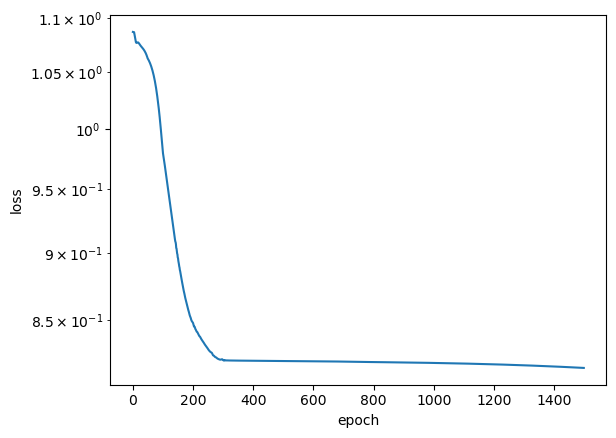

In [31]:
# plot loss
trainer_metrics = trainer.callbacks[0].metrics
loss = trainer_metrics["train_loss"]
epochs = range(len(loss))
plt.plot(epochs, loss.cpu())
# plotting
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale("log")

# Test NN: Plot errors in output/target features

In [32]:
all_outputs = None
all_targets = None

trainer.data_module.setup("test")
with torch.no_grad():
    for data in trainer.data_module.test_dataloader():
    # for data in trainer.data_module.train_dataloader():
        inputs, target = data[0][1]["input"], data[0][1]["target"]
        outputs = solver(inputs)
        
        if all_outputs is None:
            all_outputs = LabelTensor(outputs, labels=output_columns)
            all_targets = target
        else:
            all_outputs.append(LabelTensor(outputs, labels=output_columns))
            all_targets.append(target)
        break

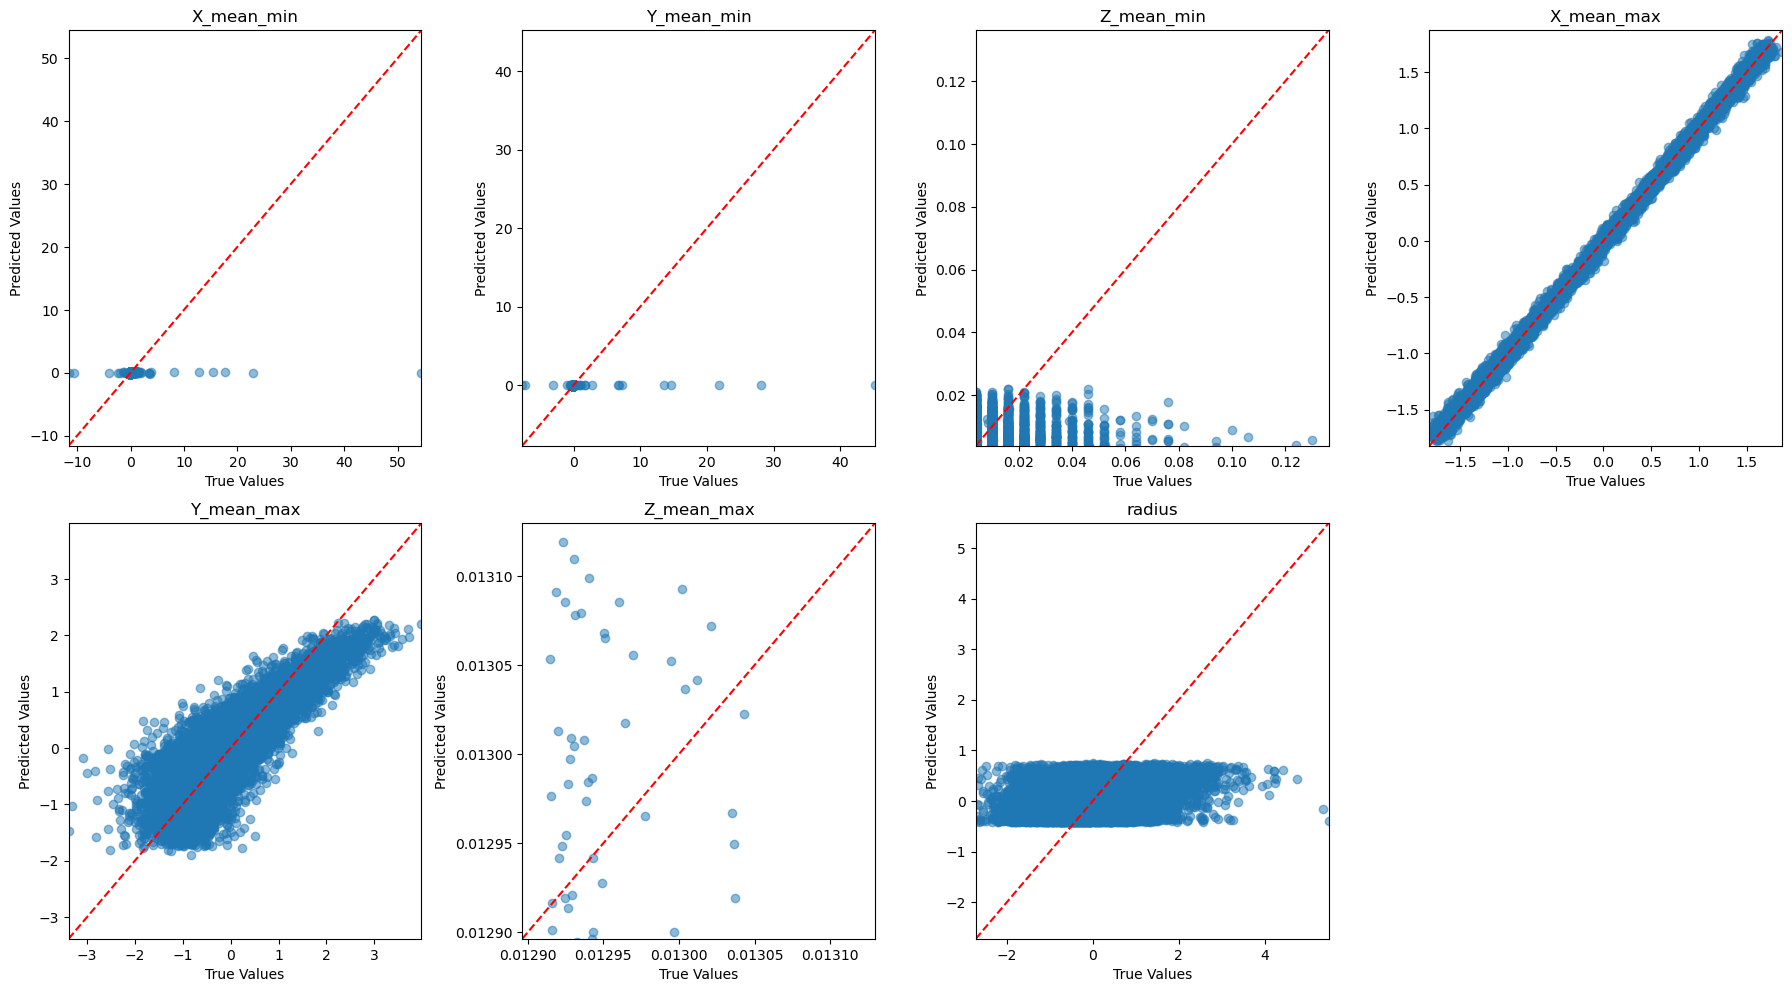

In [34]:
# plot targets vs predictions for validation set
y_mean, y_std = all_outputs.mean(0).detach(), all_outputs.std(0).detach()
true_output = all_targets.detach()

plt.figure(figsize=(18, 10))
# use 3 columns per row
for i, col in enumerate(output_columns):
    plt.subplot(len(output_columns)//4+1, 4, i+1)
    plt.scatter(true_output[:, i], y_mean[:, i], alpha=0.5)#, s=20*y_std[:, i]/y_std.max())
    plt.plot([true_output[:, i].min(), true_output[:, i].max()],
             [true_output[:, i].min(), true_output[:, i].max()], 'r--')
    
    plt.xlim([true_output[:, i].min(), true_output[:, i].max()])
    plt.ylim([true_output[:, i].min(), true_output[:, i].max()])
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(col)
plt.tight_layout(pad=1.0)
